Load Libraries

In [70]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

Load Data

In [71]:
#read data
df = pd.read_csv('../Data/data_modeling.csv')

In [72]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price', 'price_category', 'Brand_Alfa Romeo',
       'Brand_Audi', 'Brand_BMW', 'Brand_Buick', 'Brand_Chevrolet',
       'Brand_Dodge', 'Brand_Honda', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Mazda', 'Brand_Mercury', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Peugeot', 'Brand_Plymouth', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Saab', 'Brand_Subaru', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginet

## Model to predict cars price

Prepare variables to apply in Linear Regression Model

In [73]:
analysis_col=['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW', 'Brand_Buick',
       'Brand_Chevrolet', 'Brand_Dodge', 'Brand_Honda', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Mazda', 'Brand_Mercury', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Peugeot', 'Brand_Plymouth', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Saab', 'Brand_Subaru', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']

X = df[analysis_col]
y = df.price

Train model

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lineal_model = LinearRegression()
lineal_model.fit(X_train,y_train)

y_predict = lineal_model.predict(X_test)

Visualize metrics

In [75]:
print ('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print ('MSE:', metrics.mean_squared_error(y_test, y_predict))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R2: ', metrics.r2_score(y_test, y_predict))

MAE: 1927.4929877963943
MSE: 8025309.479247417
RMSE: 2832.8977177525167
R2:  0.8841685580486517


Plot train ans test results

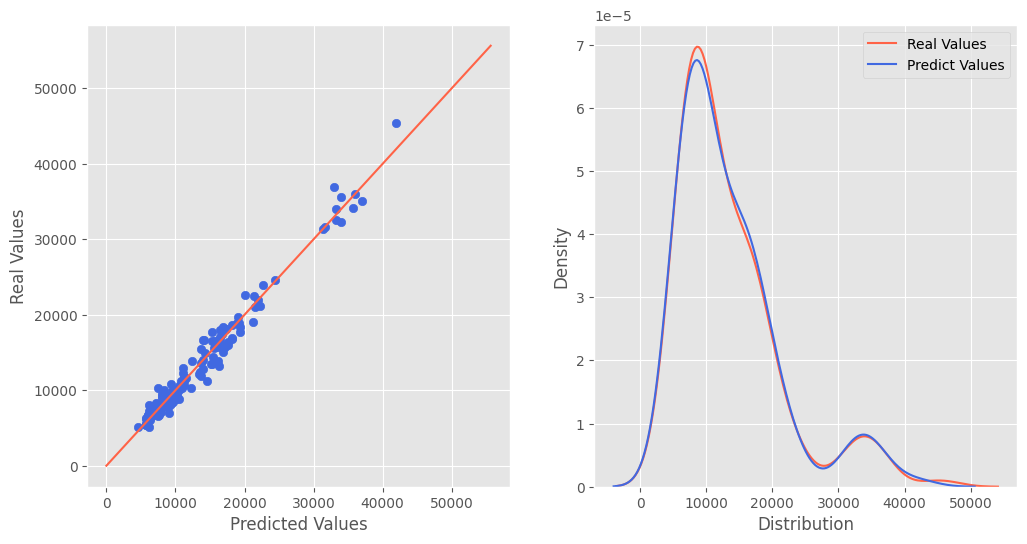

In [76]:
def model_reg(y, y_predict):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_predict, y, label='Real vs. Predicted', color='royalblue')  # Cambiado a rojo más intenso
    plt.xlabel('Predicted Values')
    plt.ylabel('Real Values')
    plt.plot([0, np.max(y) + 2 * np.min(y)], [0, np.max(y) + 2 * np.min(y)], '-', color="tomato")

    plt.subplot(1, 2, 2)
    sns.distplot(y, hist=False, color='tomato', label='Real Values')  # Cambiado a rojo más intenso
    sns.distplot(y_predict, hist=False, color='royalblue', label='Predict Values', axlabel="Distribution")  # Cambiado a azul rey

    plt.legend()
    plt.show()

model_reg(y_train, lineal_model.predict(X_train))

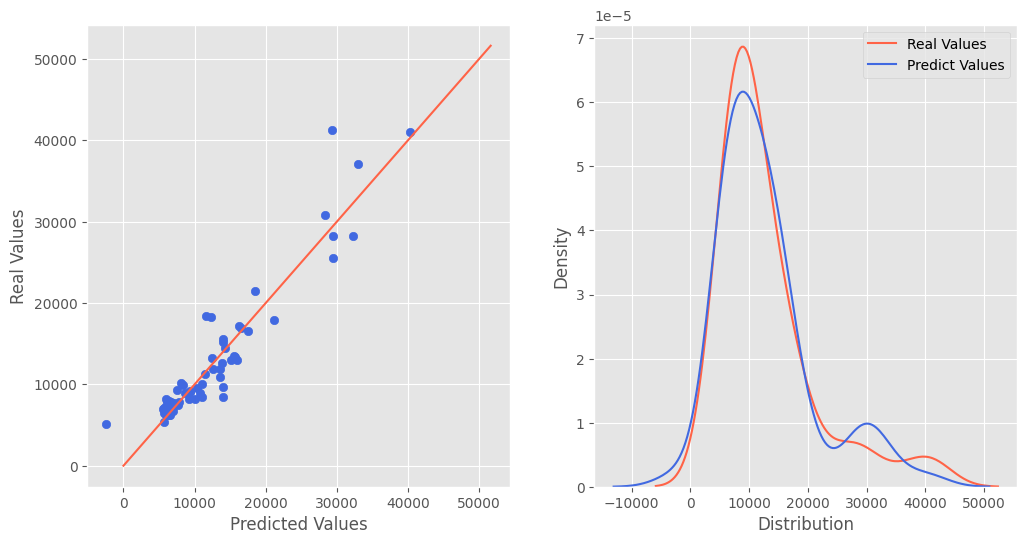

In [77]:
model_reg (y_test, lineal_model.predict(X_test))

Let's fit the model with cross validation

In [78]:
def regcross(analysis_col):

    X = df[analysis_col]
    y = df.price
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
    lreg_cross = LinearRegression()
 
    lreg_cross.fit(X_train, y_train)
 
    score = lreg_cross.score(X_train,y_train)
 
    kf = KFold(n_splits=10, shuffle=True, random_state=68)
 
    cv_scores = cross_val_score(lreg_cross, X_train, y_train, cv=kf)
    
    cv_scores = [round(num, 3) for num in cv_scores]

    print("Model metrics without cross validation: ")
    print(score)
    print('coefficients with cross validation: ')
    print(cv_scores)
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Average R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Std Dev: {:.3f}'.format(np.std(cv_scores)))
    print(f'Confidence interval 95%: {np.quantile(cv_scores, [0.025, 0.975])}', '\n')
 
    y_pred = lreg_cross.predict(X_test)
    print ('Metrics Test')
    print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('Test R2:', metrics.r2_score(y_test, y_pred))

regcross(analysis_col)

Model metrics without cross validation: 
0.973720470092239
coefficients with cross validation: 
[0.953, 0.848, 0.92, 0.948, 0.924, 0.894, 0.95, 0.947, 0.947, 0.8]
Max R-Squared: 0.953
Min R-Squared: 0.8
Average R-Squared: 0.913
Std Dev: 0.049
Confidence interval 95%: [0.8108   0.952325] 

Metrics Test
Test MAE: 1713.8599209798817
Test MSE: 6967014.671637996
Test RMSE: 2639.510309060754
Test R2: 0.8944989084214223


## Model to classify cheap and expensive cars

Prepare variables to apply in classification models

In [79]:
analysis_col2 = ['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueltype_diesel', 'fueltype_gas', 
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']

X = df[analysis_col2]
y = df.price_category

Train Random Forest Model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [81]:
y_pred_rf = rf_classifier.predict(X_test)

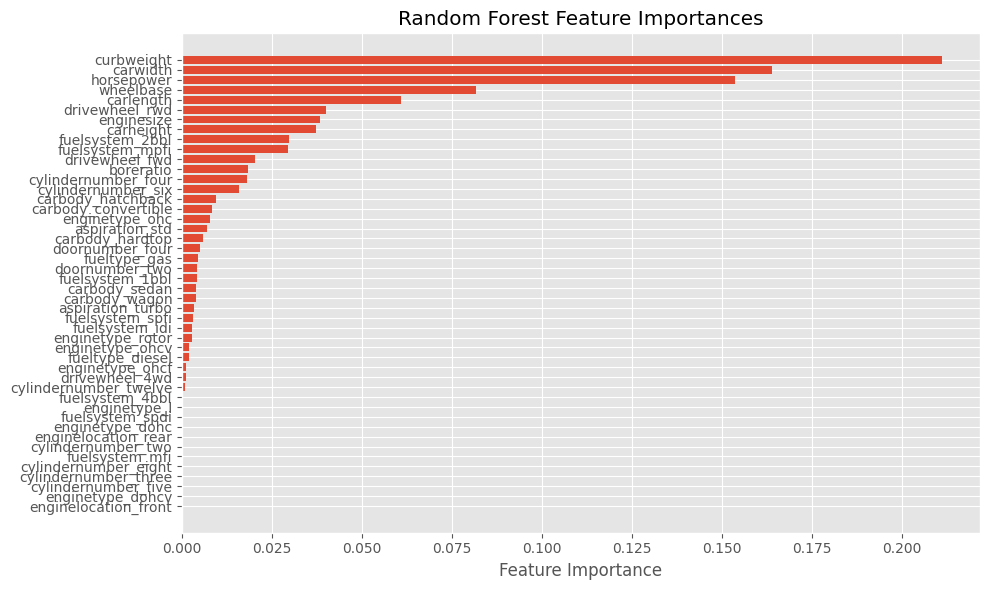

In [82]:
# Plot feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Accuracy: 1.0


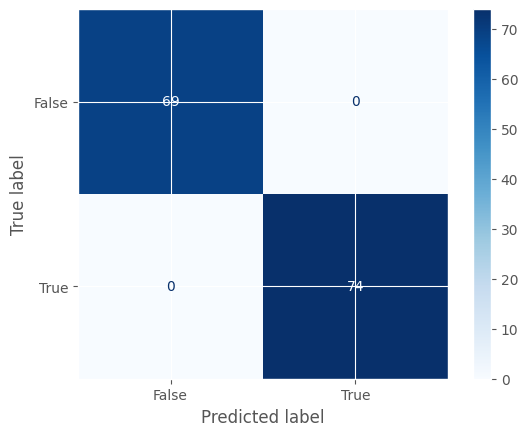

In [83]:
def conf_mat_acc(modelo, X, y):
    y_pred = modelo.predict(X)
    cm = confusion_matrix(y, y_pred, labels=y.unique())
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    print('Accuracy:', np.round(accuracy, 2))
    
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.show()


conf_mat_acc(rf_classifier, X_train, y_train)

Accuracy: 0.92


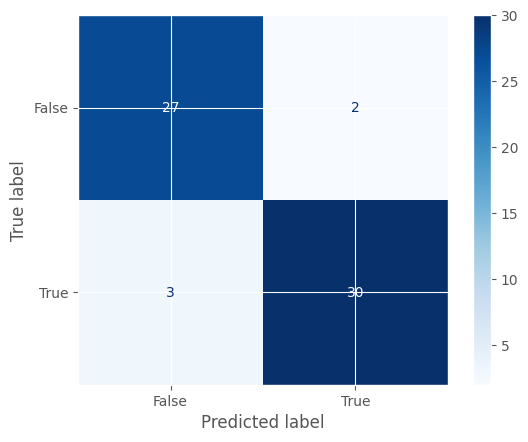

In [84]:
conf_mat_acc(rf_classifier, X_test, y_test)

Standarize the parameters

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Calculate the estimators of the models and show the Grid and the parameters to estimate in each model.

In [86]:
# create a list of models to be used for hyperparameter search.
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]

#create a list that contains dictionaries with the different sets of hyperparameters to test for each model. 
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]},
    { "criterion" : ["gini", "entropy"],
      "min_samples_leaf": [5,10,15,20,None], 
      "max_depth" : [1,3,4,5,8,9,10,11,12,13,14,None],
      "min_samples_split": [2, 3, 4,None]}
]

#Create a StratifiedKFold object to perform 10-fold stratified cross validation.
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

# Create an empty list that will contain the hyperparameter search results for each model.
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14,
                                       None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min

In [87]:
#Accuracy per model
for i in range(len(models)):
    print(f"Best score for {models[i].__class__.__name__}:\n{grids[i].best_score_}")

Best score for LogisticRegression:
0.9023809523809525
Best score for KNeighborsClassifier:
0.8952380952380953
Best score for DecisionTreeClassifier:
0.8952380952380953


In [88]:
#Parameters per model
for i in range(len(models)):    
    print(f"Best parameters for {models[i].__class__.__name__}:\n{grids[i].best_params_}")

Best parameters for LogisticRegression:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best parameters for KNeighborsClassifier:
{'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Best parameters for DecisionTreeClassifier:
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [89]:
#Estimators per model
for i in range(len(models)):  
    print(f"Best estimator for {models[i].__class__.__name__}:\n{grids[i].best_estimator_}")

Best estimator for LogisticRegression:
LogisticRegression(C=1, penalty='l1', solver='saga')
Best estimator for KNeighborsClassifier:
KNeighborsClassifier(n_neighbors=18, p=1, weights='distance')
Best estimator for DecisionTreeClassifier:
DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=4)


Test the models

In [90]:
X_test = scaler.transform(X_test)

Accuracy LogisticRegression: 0.94


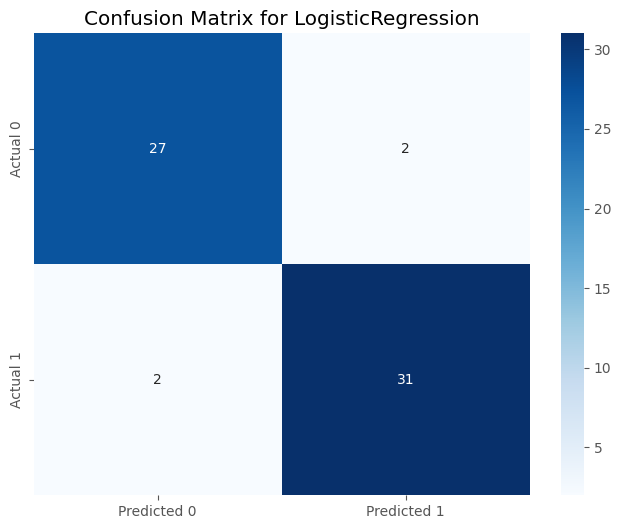

Accuracy KNeighborsClassifier: 0.82


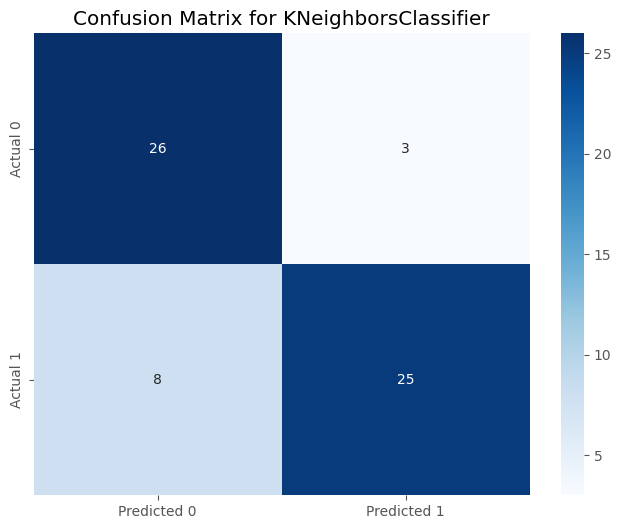

Accuracy DecisionTreeClassifier: 0.94


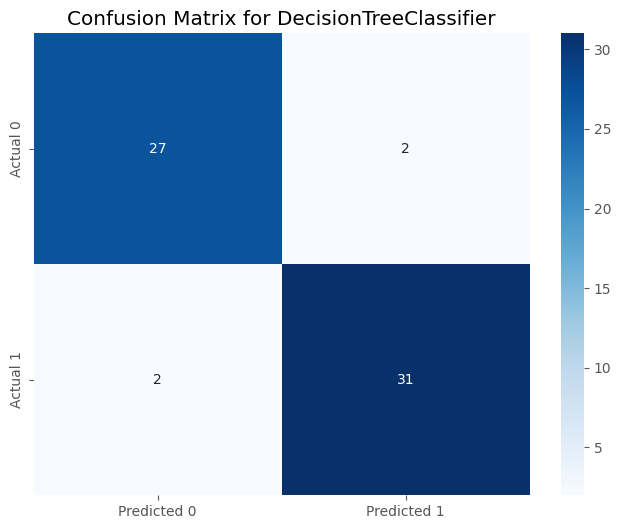

In [94]:
# Create an empty list to store accuracies for each model
accuracies = []

#  Iterate over each trained model
for i in range(len(models)):
    # Make predictions on the test set
    y_pred = grids[i].predict(X_test)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display the accuracy
    accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
    print(f"Accuracy {models[i].__class__.__name__}: {accuracy:.2f}")
    
    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted 0", "Predicted 1"], 
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix for {models[i].__class__.__name__}")
    plt.show()


In [92]:
for i in range(len(models)):
    y_pred = grids[i].predict(X_test)
    print(f"Evaluation metrics for {models[i].__class__.__name__}:\n")
    print(classification_report(y_test, y_pred))

Evaluation metrics for LogisticRegression:

              precision    recall  f1-score   support

       False       0.93      0.93      0.93        29
        True       0.94      0.94      0.94        33

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

Evaluation metrics for KNeighborsClassifier:

              precision    recall  f1-score   support

       False       0.76      0.90      0.83        29
        True       0.89      0.76      0.82        33

    accuracy                           0.82        62
   macro avg       0.83      0.83      0.82        62
weighted avg       0.83      0.82      0.82        62

Evaluation metrics for DecisionTreeClassifier:

              precision    recall  f1-score   support

       False       0.93      0.93      0.93        29
        True       0.94      0.94      0.94        33

    accuracy                           0.94 

## Conclusion

- Random Forest has an accuracy of 98% in the test
- Logistic Regression has an accuracy of 94% in the test
- KNeighbors has an accuracy of 82%
- Decision tree has an accuracy of 94%

Although Random Forest has the best score, we think that the result closest to reality may be that of the Logistic Regression or the Decision Tree because the amount of data is not large enough for the Random Forest to perform an objective test.